# Step 1: Data Loading and Initial Exploration

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the data
df_results = pd.read_csv('data/survey_results_public.csv')
df_schema = pd.read_csv('data/survey_results_schema.csv')

# Display basic information
print(f"Dataset shape: {df_results.shape}")
print(f"Number of questions: {len(df_schema)}")

# Display the first few rows of the dataset
df_results.head()


Dataset shape: (65437, 114)
Number of questions: 87


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [2]:
from IPython.display import Markdown, display
stats = df_results['ConvertedCompYearly'].describe()

markdown_table = f"""
| Statistic | Value |
|-----------|-------|
| Count | {stats['count']:,.0f} responses |
| Mean Salary | ${stats['mean']:,.2f} |
| Standard Deviation | ${stats['std']:,.2f} |
| Minimum | ${stats['min']:,.2f} |
| 25th Percentile | ${stats['25%']:,.2f} |
| Median | ${stats['50%']:,.2f} |
| 75th Percentile | ${stats['75%']:,.2f} |
| Maximum | ${stats['max']:,.2f} |
"""

display(Markdown(markdown_table))


| Statistic | Value |
|-----------|-------|
| Count | 23,435 responses |
| Mean Salary | $86,155.29 |
| Standard Deviation | $186,756.97 |
| Minimum | $1.00 |
| 25th Percentile | $32,712.00 |
| Median | $65,000.00 |
| 75th Percentile | $107,971.50 |
| Maximum | $16,256,603.00 |


# Step 2: Exploratory Data Analysis (EDA)

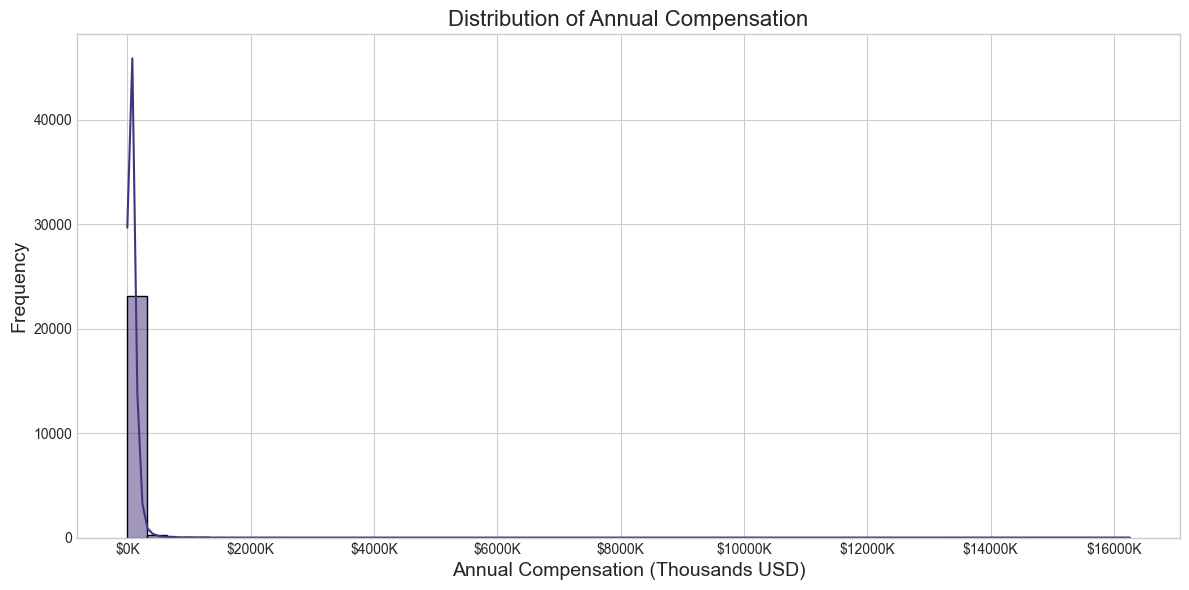

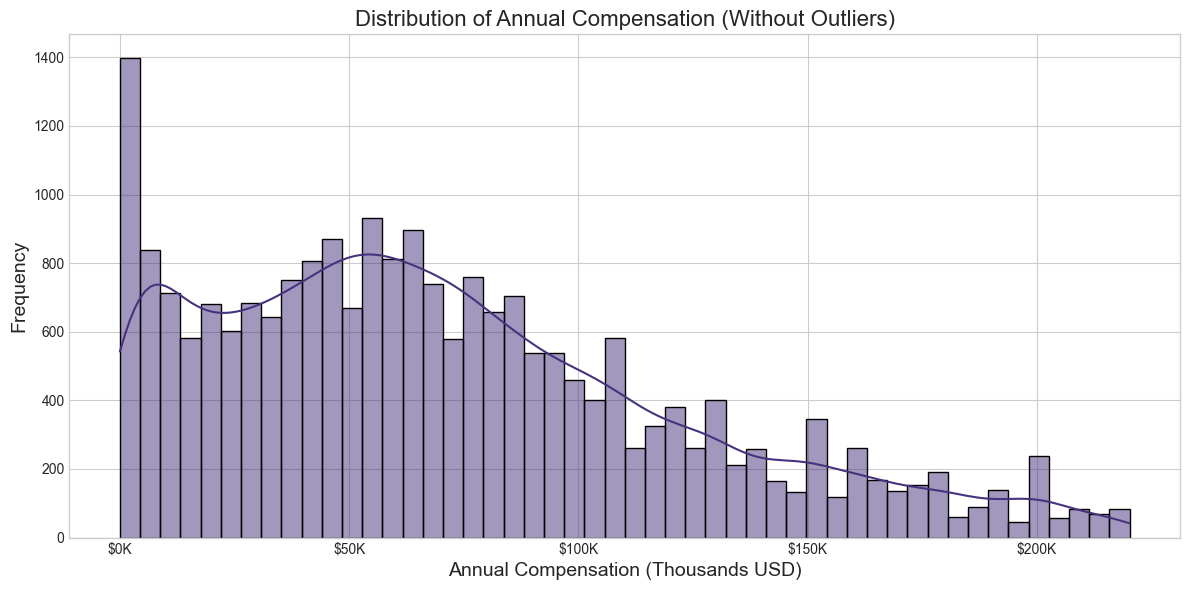

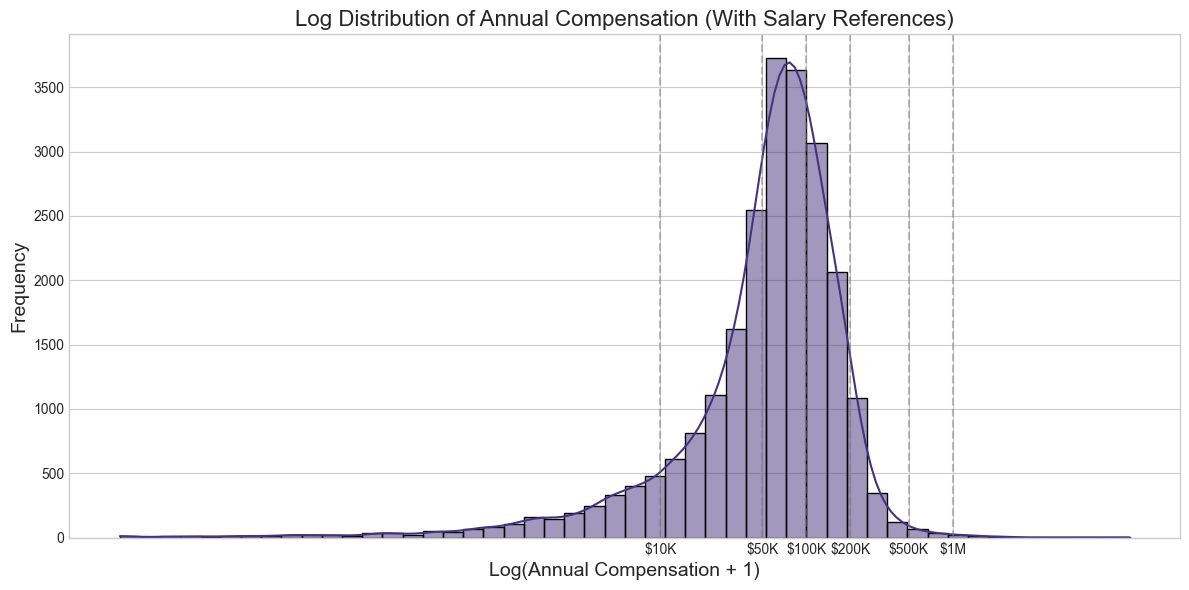

In [3]:
# Import the FuncFormatter for custom axis formatting
from matplotlib.ticker import FuncFormatter

# Function to format numbers in thousands of dollars
def thousands_dollars_formatter(x, pos):
    return f'${x/1000:.0f}K'

# Create a formatter object
thousands_formatter = FuncFormatter(thousands_dollars_formatter)

# Examine the salary distribution with formatted x-axis
plt.figure(figsize=(12, 6))
ax = sns.histplot(df_results['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribution of Annual Compensation', fontsize=16)
plt.xlabel('Annual Compensation (Thousands USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(thousands_formatter)

plt.tight_layout()
plt.show()

# Check for outliers and apply a reasonable cap
q1 = df_results['ConvertedCompYearly'].quantile(0.25)
q3 = df_results['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# Create a filtered dataframe for visualization
df_filtered = df_results[df_results['ConvertedCompYearly'] <= upper_bound].copy()

# Plot with filtered data and formatted x-axis
plt.figure(figsize=(12, 6))
ax = sns.histplot(df_filtered['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribution of Annual Compensation (Without Outliers)', fontsize=16)
plt.xlabel('Annual Compensation (Thousands USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(thousands_formatter)

plt.tight_layout()
plt.show()

# Log transformation for better visualization

plt.figure(figsize=(12, 6))
ax = sns.histplot(np.log1p(df_results['ConvertedCompYearly'].dropna()), bins=50, kde=True)
plt.title('Log Distribution of Annual Compensation (With Salary References)', fontsize=16)
plt.xlabel('Log(Annual Compensation + 1)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add reference lines and labels for actual salary values
salary_references = [10000, 50000, 100000, 200000, 500000, 1000000]
log_references = [np.log1p(sal) for sal in salary_references]
labels = ['$10K', '$50K', '$100K', '$200K', '$500K', '$1M']

plt.xticks(log_references, labels)
for sal, log_sal in zip(salary_references, log_references):
    plt.axvline(x=log_sal, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Step 3: Identify Potential Predictors

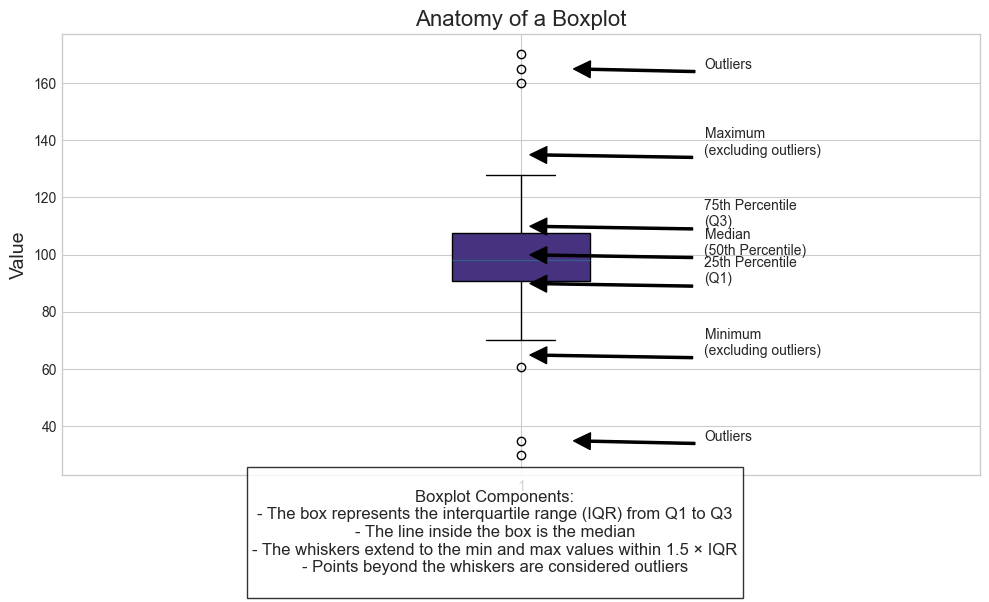


## Understanding Boxplots in Our Salary Analysis

In our salary analysis boxplots:

- **Box**: Represents the middle 50% of salaries (interquartile range)
- **Line in Box**: Median salary for that category
- **Whiskers**: Extend to the minimum and maximum values within 1.5 times the interquartile range
- **Circles**: Outliers - individual data points that fall outside the whiskers

Outliers are particularly important in salary data as they often represent:
1. Exceptionally high-earning individuals
2. Potential data entry errors
3. Special cases (e.g., part-time workers, executives)

The presence of many outliers in certain categories might indicate greater salary variability or opportunity in those areas.



In [4]:
# Create an explanatory figure for boxplot components
plt.figure(figsize=(10, 6))
# Generate sample data with outliers
np.random.seed(42)
data = np.concatenate([np.random.normal(100, 15, 100), np.array([160, 165, 170, 30, 35])])


# Create the boxplot
box = plt.boxplot(data, patch_artist=True)
plt.title('Anatomy of a Boxplot', fontsize=16)
plt.ylabel('Value', fontsize=14)

# Add annotations to explain each component
plt.annotate('Outliers', xy=(1.05, 165), xytext=(1.2, 165),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('Maximum\n(excluding outliers)', xy=(1, 135), xytext=(1.2, 135),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('75th Percentile\n(Q3)', xy=(1, 110), xytext=(1.2, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('Median\n(50th Percentile)', xy=(1, 100), xytext=(1.2, 100),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('25th Percentile\n(Q1)', xy=(1, 90), xytext=(1.2, 90),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('Minimum\n(excluding outliers)', xy=(1, 65), xytext=(1.2, 65),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.annotate('Outliers', xy=(1.05, 35), xytext=(1.2, 35),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Add explanation text
explanation = """
Boxplot Components:
- The box represents the interquartile range (IQR) from Q1 to Q3
- The line inside the box is the median
- The whiskers extend to the min and max values within 1.5 × IQR
- Points beyond the whiskers are considered outliers
"""
plt.figtext(0.5, 0.01, explanation, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Add a markdown explanation
print("""
## Understanding Boxplots in Our Salary Analysis

In our salary analysis boxplots:

- **Box**: Represents the middle 50% of salaries (interquartile range)
- **Line in Box**: Median salary for that category
- **Whiskers**: Extend to the minimum and maximum values within 1.5 times the interquartile range
- **Circles**: Outliers - individual data points that fall outside the whiskers

Outliers are particularly important in salary data as they often represent:
1. Exceptionally high-earning individuals
2. Potential data entry errors
3. Special cases (e.g., part-time workers, executives)

The presence of many outliers in certain categories might indicate greater salary variability or opportunity in those areas.
""")


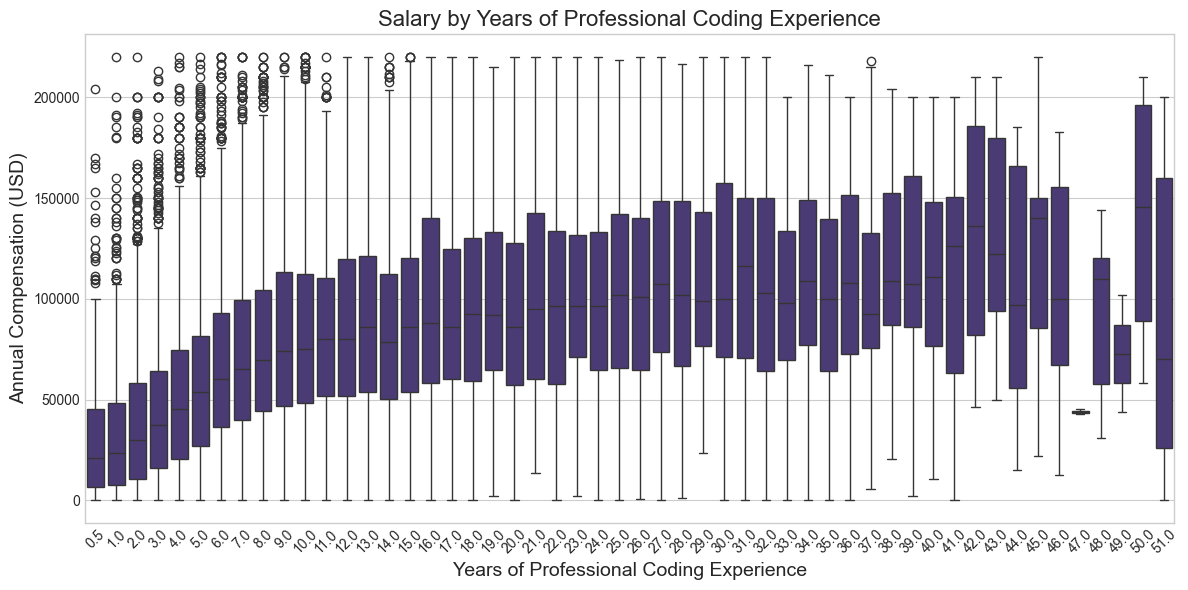

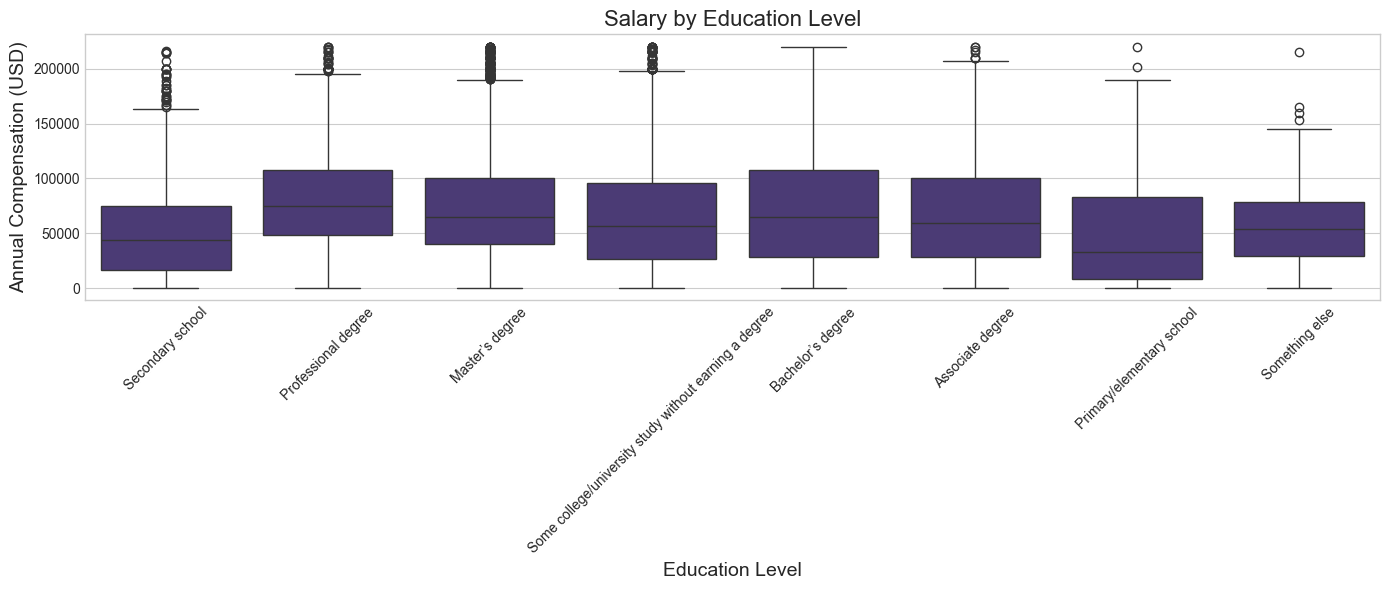

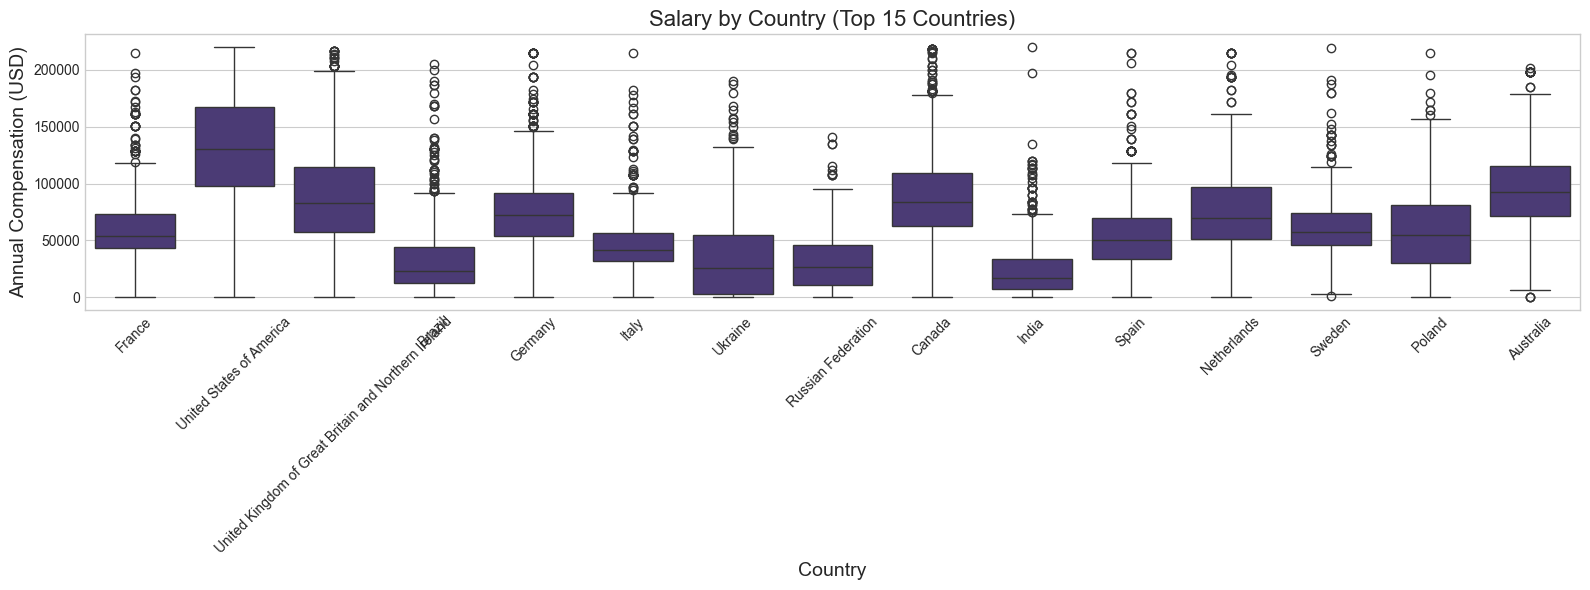

In [5]:
# Choose potential predictors for salary
predictors = [
    'YearsCodePro',  # Professional coding experience
    'EdLevel',       # Education level
    'Country',       # Location
    'DevType',       # Developer type/role
    'OrgSize',       # Organization size
    'MainBranch',    # Professional status
    'Employment',    # Employment status
    'RemoteWork',    # Remote work status
    'Age',           # Age
    'LanguageHaveWorkedWith'  # Programming languages
]

# as YearsCodePro is mixed with numeric and string values (more than 50 and less than 1),
# we replace Less than 1 Year with 0.5 and More than 50 years with 51
# Replace string values
# First, make sure the replacement is done in the dataframe used for plotting
df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].replace('Less than 1 year', '0.5')
df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].replace('More than 50 years', '51')

# Convert to numeric
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'])

# Analyze relationship between experience and salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearsCodePro', y='ConvertedCompYearly', data=df_filtered)
plt.title('Salary by Years of Professional Coding Experience', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Annual Compensation (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


# Create a function to clean education level labels
import re
def clean_education_label(label):
    # Remove text in parentheses
    return re.sub(r'\s*\([^)]*\)', '', label)

# Create a copy of the education level column with cleaned labels
if 'EdLevel' in df_filtered.columns:
    df_filtered['EdLevel_Clean'] = df_filtered['EdLevel'].apply(clean_education_label)

# Analyze relationship between education and salary
plt.figure(figsize=(14, 6))
sns.boxplot(x='EdLevel_Clean', y='ConvertedCompYearly', data=df_filtered)
plt.title('Salary by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Annual Compensation (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Analyze relationship between country and salary (top 15 countries by count)
top_countries = df_results['Country'].value_counts().head(15).index
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(16, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.title('Salary by Country (Top 15 Countries)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Annual Compensation (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


# Step 4: Data Cleaning and Preparation

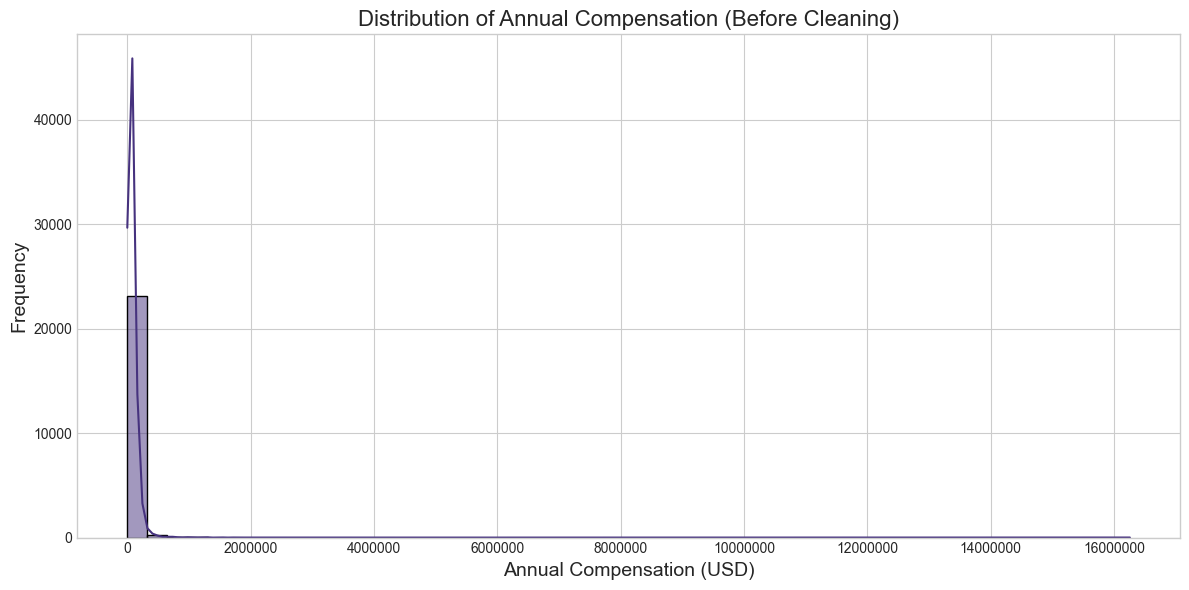

Missing values in each column:
YearsCodePro              13827
EdLevel                    4653
Country                    6507
DevType                    5992
OrgSize                   17957
MainBranch                    0
Employment                    0
RemoteWork                10631
Age                           0
LanguageHaveWorkedWith     5692
ConvertedCompYearly       42002
dtype: int64

Removing 42002 rows with missing salary values

Cleaning YearsCodePro column...

Cleaning Age column...
Unique values in Age column:
['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']

Handling missing values in predictor columns...
Column YearsCodePro: 90 missing values
  - Filled with median: 8.0
Column DevType: 32 missing values
  - Filled with mode: Developer, full-stack
Column OrgSize: 25 missing values
  - Filled with mode: 20 to 99 employees
Column RemoteWork: 8 missing values
  - Filled

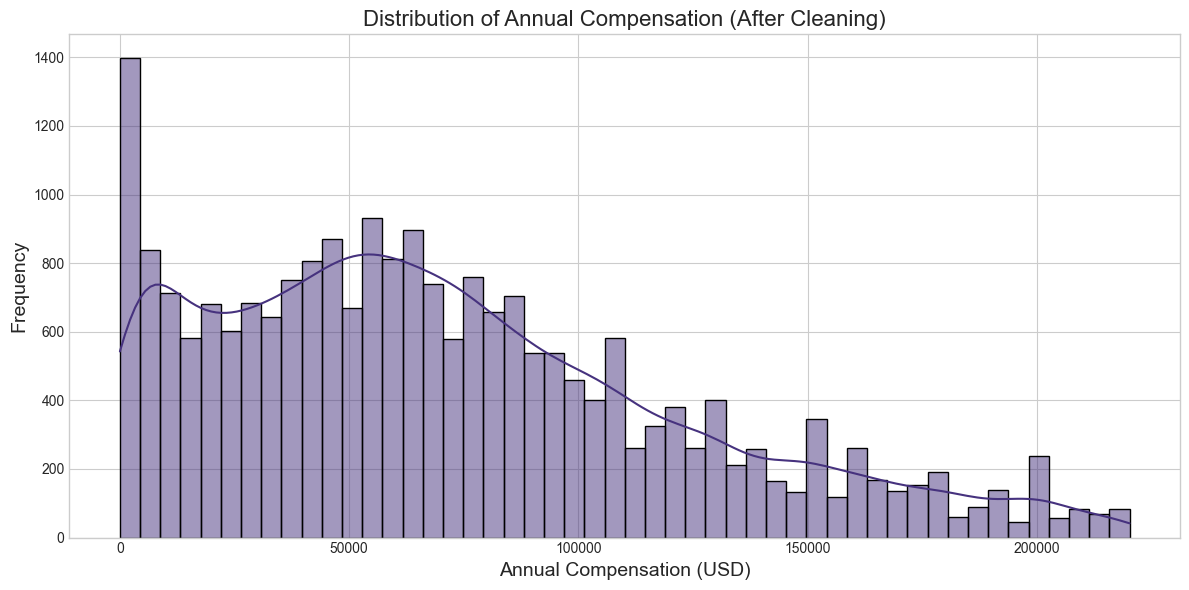


Found 545 entries with salaries below $1,000
These might be errors or part-time workers.


In [6]:
# Create a clean dataframe for modeling
df_model = df_results[predictors + ['ConvertedCompYearly']].copy()

# First, let's examine the salary distribution before any cleaning
plt.figure(figsize=(12, 6))
sns.histplot(df_model['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribution of Annual Compensation (Before Cleaning)', fontsize=16)
plt.xlabel('Annual Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# Check missing values
missing_values = df_model.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Important: For salary data, we'll remove rows with missing values rather than imputing
target_missing = df_model['ConvertedCompYearly'].isna().sum()
if target_missing > 0:
    print(f"\nRemoving {target_missing} rows with missing salary values")
    df_model = df_model.dropna(subset=['ConvertedCompYearly'])

# Handle YearsCodePro conversion
if 'YearsCodePro' in df_model.columns:
    print("\nCleaning YearsCodePro column...")
    # Replace text values
    df_model['YearsCodePro'] = df_model['YearsCodePro'].replace('Less than 1 year', '0.5')
    df_model['YearsCodePro'] = df_model['YearsCodePro'].replace('More than 50 years', '51')
    
    # Convert to numeric
    df_model['YearsCodePro'] = pd.to_numeric(df_model['YearsCodePro'], errors='coerce')

# Handle Age column if it exists and needs similar treatment
if 'Age' in df_model.columns and df_model['Age'].dtype == 'object':
    print("\nCleaning Age column...")
    # Check unique values
    print("Unique values in Age column:")
    print(df_model['Age'].unique())
    
    # Convert to numeric if possible
    df_model['Age'] = pd.to_numeric(df_model['Age'], errors='coerce')

# Handle missing values for predictor columns (not the target)
print("\nHandling missing values in predictor columns...")
for col in df_model.columns:
    if col != 'ConvertedCompYearly':  # Skip the target column
        missing_count = df_model[col].isna().sum()
        if missing_count > 0:
            print(f"Column {col}: {missing_count} missing values")
            
            if df_model[col].dtype in ['int64', 'float64']:
                # For numerical columns: impute with median
                median_val = df_model[col].median()
                df_model[col].fillna(median_val, inplace=True)
                print(f"  - Filled with median: {median_val}")
            else:
                # For categorical columns: impute with mode
                mode_val = df_model[col].mode()[0]
                df_model[col].fillna(mode_val, inplace=True)
                print(f"  - Filled with mode: {mode_val}")

# Apply salary cap to remove extreme outliers
q1 = df_model['ConvertedCompYearly'].quantile(0.25)
q3 = df_model['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers_count = (df_model['ConvertedCompYearly'] > upper_bound).sum()
print(f"\nRemoving {outliers_count} salary outliers above ${upper_bound:,.2f}")
df_model = df_model[df_model['ConvertedCompYearly'] <= upper_bound]

# Check for any remaining missing values
remaining_missing = df_model.isna().sum().sum()
if remaining_missing > 0:
    print(f"\nWarning: {remaining_missing} missing values remain in the dataset")
    print(df_model.isna().sum())
else:
    print("\nNo missing values remain in the dataset")

# Print the shape of the cleaned dataset
print(f"\nShape of cleaned dataset: {df_model.shape}")

# Visualize the distribution of the target variable after cleaning
plt.figure(figsize=(12, 6))
sns.histplot(df_model['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Distribution of Annual Compensation (After Cleaning)', fontsize=16)
plt.xlabel('Annual Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# Check for zero or very low salaries that might be errors
low_salary_count = (df_model['ConvertedCompYearly'] < 1000).sum()
if low_salary_count > 0:
    print(f"\nFound {low_salary_count} entries with salaries below $1,000")
    print("These might be errors or part-time workers.")
    
    # Consider removing these as well if they seem like errors
    # df_model = df_model[df_model['ConvertedCompYearly'] >= 1000]


# Step 5 Feature Engineering
prepare our data for modeling

1. Identifiy numerical and categorical columns and examines their properties
2. Handle high-cardinality categorical features by grouping less common values
3. Process programming language data by creating binary features for top languages
4. Create interaction features between numerical columns
5. Add polynomial features for important numerical predictors like YearsCodePro
6. Calculate and visualize correlations between features and salary
7. Saves the processed dataset for modeling

In [8]:
# Step 5: Feature Engineering with Pipeline (Fixed)

# Import required libraries for feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Identify numerical and categorical columns
numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('ConvertedCompYearly')  # Remove target variable
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Check for any missing values in the data
missing_values = df_model[numerical_cols + categorical_cols].isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Handle programming languages if present
if 'LanguageHaveWorkedWith' in df_model.columns:
    print("\nProcessing programming language data...")
    
    # Split the comma-separated language list
    languages = df_model['LanguageHaveWorkedWith'].str.split(';').explode()
    top_languages = languages.value_counts().head(10).index
    
    print(f"Top 10 programming languages: {', '.join(top_languages)}")
    
    # Create binary columns for each top language
    for lang in top_languages:
        df_model[f'Uses_{lang}'] = df_model['LanguageHaveWorkedWith'].str.contains(lang, na=False).astype(int)
        numerical_cols.append(f'Uses_{lang}')
    
    # Remove the original language column
    if 'LanguageHaveWorkedWith' in categorical_cols:
        categorical_cols.remove('LanguageHaveWorkedWith')
    df_model = df_model.drop('LanguageHaveWorkedWith', axis=1)

# Create preprocessing pipelines for both numerical and categorical data
# For numerical data: first impute, then scale (no polynomial features yet)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical data: impute then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # We'll add polynomial features after the initial preprocessing
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    # The model will be added in the next step
])

# Prepare the data for modeling
X = df_model.drop('ConvertedCompYearly', axis=1)
y = df_model['ConvertedCompYearly']

# Print shapes to debug
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Verify column names
print(f"\nX columns: {X.columns.tolist()}")

# Save the pipeline for later use
import joblib
joblib.dump(model_pipeline, 'salary_pipeline.pkl')
print("\nPipeline saved to 'salary_pipeline.pkl'")

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
display(model_pipeline)

# Apply just the preprocessor to see the transformed data shape
X_preprocessed = preprocessor.fit_transform(X)
print(f"\nPreprocessed X shape: {X_preprocessed.shape}")

# Now we can safely apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X_preprocessed)
print(f"After polynomial features, X shape: {X_poly.shape}")


Numerical columns: ['YearsCodePro', 'Age', 'Uses_JavaScript', 'Uses_SQL', 'Uses_HTML/CSS', 'Uses_Python', 'Uses_TypeScript', 'Uses_Bash/Shell (all shells)', 'Uses_C#', 'Uses_Java', 'Uses_C++', 'Uses_PHP']
Categorical columns: ['EdLevel', 'Country', 'DevType', 'OrgSize', 'MainBranch', 'Employment', 'RemoteWork']

Missing values in each column:
Age    22457
dtype: int64

X shape: (22457, 19)
y shape: (22457,)

X columns: ['YearsCodePro', 'EdLevel', 'Country', 'DevType', 'OrgSize', 'MainBranch', 'Employment', 'RemoteWork', 'Age', 'Uses_JavaScript', 'Uses_SQL', 'Uses_HTML/CSS', 'Uses_Python', 'Uses_TypeScript', 'Uses_Bash/Shell (all shells)', 'Uses_C#', 'Uses_Java', 'Uses_C++', 'Uses_PHP']

Pipeline saved to 'salary_pipeline.pkl'


,steps,"[('preprocessor', ...), ('poly', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True



Preprocessed X shape: (22457, 286)
After polynomial features, X shape: (22457, 41041)


# Step 6: Model Selection and Training
1. Train a Random Forest model with default parameters
2. Evaluate the model using RMSE, MAE, R², and cross-validation
3. Visualize the predictions against actual values
4. Performs hyperparameter tuning using RandomizedSearchCV to find the best model configuration
5. Compares the tuned model to the original model
6. Saves the best model for future use
7. Analyzes feature importance to understand which factors most influence salary predictions

In [ ]:
# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Create a pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
print("Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation score
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2')

# Print results
print("\nRandom Forest Results:")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"5-Fold CV R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary ($)', fontsize=14)
plt.ylabel('Predicted Salary ($)', fontsize=14)
plt.title('Random Forest: Actual vs Predicted Salary', fontsize=16)

# Format axis labels to show thousands
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, p: f'${x/1000:.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


Training set shape: (17965, 19)
Testing set shape: (4492, 19)
Training Random Forest model...


In [ ]:
#optional: Hyperparameter tuning with RandomizedSearchCV
print("\nPerforming hyperparameter tuning...")

# Define the parameter grid
param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(5, 30),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

# Create the random search
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train, y_train)

# Print the best parameters
print("\nBest parameters:")
print(random_search.best_params_)

# Evaluate the tuned model
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate metrics for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print results for the tuned model
print("\nTuned Random Forest Results:")
print(f"RMSE: ${rmse_tuned:,.2f}")
print(f"MAE: ${mae_tuned:,.2f}")
print(f"R² Score: {r2_tuned:.4f}")

# Compare original vs tuned model
improvement = (r2_tuned - r2) / r2 * 100
print(f"\nImprovement in R² Score: {improvement:.2f}%")

# Create a scatter plot of predicted vs actual values for the tuned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary ($)', fontsize=14)
plt.ylabel('Predicted Salary ($)', fontsize=14)
plt.title('Tuned Random Forest: Actual vs Predicted Salary', fontsize=16)

# Format axis labels to show thousands
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Save the best model
import joblib
joblib.dump(best_model, 'random_forest_salary_model.pkl')
print("\nBest model saved to 'random_forest_salary_model.pkl'")

# Feature importance analysis
try:
    # Get the feature names after preprocessing
    preprocessed_X_train = best_model.named_steps['preprocessor'].transform(X_train)
    
    # Get the Random Forest model from the pipeline
    rf_model = best_model.named_steps['model']
    
    # Get feature importances
    importances = rf_model.feature_importances_
    
    # Get feature names (this is tricky with the pipeline)
    # We'll create a simplified version with just the top importances
    indices = np.argsort(importances)[::-1]
    
    # Plot the top 20 feature importances
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances (Random Forest)', fontsize=16)
    plt.bar(range(20), importances[indices][:20], align='center')
    plt.xticks(range(20), [f'Feature {i}' for i in indices[:20]], rotation=90)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 20 Feature Importances:")
    for i in range(20):
        print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")
        
except Exception as e:
    print(f"\nError extracting feature importances: {e}")
    print("This is likely due to the preprocessing pipeline transforming the feature space.")
